In [1]:
from pandas import Series, DataFrame
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Setup

Please rename this notebook from "Final Exam" to "Final Exam &lt;Your Name&gt;" (e.g., "Final Exam Deepayan Chakrabarti").

There are four GROUPS of questions:

1. **Q1-Q3** about Concepts regarding classification
2. **Q4-Q9** about exploratory analysis (Chicago Public Schools)
3. **Q10-Q12** about time series analysis (Investor Sentiment)
4. **Q13-Q15** about regression and classification (Investor Sentiment)

For each question, we have provided two cells: a Markdown cell, and a Code cell. Please provide a brief description of your approach in the Markdown cells. This is especially useful if you don't get time to work on the code itself, or can't quite get it to work perfectly. If the code is pretty trivial (say, just reading in a file), you don't need to describe it :-)

### Question 1 (10 points)

Consider the following dataset, with two features (the x and y axis) and two classes (red and blue).
![Rectangles](rects.png)

(a) Can this dataset be classified well using decision trees? Provide a brief (1-2 lines) explanation.

#### Answer

Yes, because there is a clear way to check whether or not something is of a red or blue class with just a few questions. All red points lie between (-0.5, 0.5) on the x-axis and (-0.5, 0.5) on the y-axis - anything else is a blue point.

(b) Can this dataset be classified well using logistic regression? Provide a brief (1-2 lines) explanation.

#### Answer

No, because many blue points have similar features to the red points (same x-axis or same y-axis, never both).

### Question 2 (10 points)

Consider the following dataset, with two features (the x and y axis) and two classes (red and blue).
![Rotated Rectangles](rectsrotated.png)

(a) Can this dataset be classified well using decision trees? Provide a brief (1-2 lines) explanation.

#### Answer

No, because the 'boundaries' of the inner diamond have a slope other than 0 or 1 - meaning that there's no single "yes or no" question one can ask about x-axis to y-axis to determine whether a point lies in the inner diamond.

(b) Can this dataset be classified well using logistic regression? Provide a brief (1-2 lines) explanation.

#### Answer

Yes, because the slope of the boundaries is not 0 or 1.

### Question 3 (5 points)

Consider the following dataset, with two features (the x and y axis) and two classes (red and blue).
![Points](closepoints.png)

Suppose we use k-nearest-neighbors with k=3 neighbors to classify the each point in this dataset using all the remaining points. What will be the training accuracy? Give a brief (1-2 lines) explanation.

#### Answer

It's accuracy will be 0%. Each cluster has 4 points, 2 red and 2 blue. Trying to find the classification of 1 based on the other 3 will always result in 2 of the other colored point and 1 of the same colored point, and it's classification will always be wrong.

---

## Questions 4-9 use the ChicagoPublicSchools.csv dataset.

### Question 4 (2 pts):
    Read in "ChicagoPublicSchools.csv" and print the first line. 
    
_Hint:_ some of the fields are numbers, so do not specify 'dtype=unicode'.

#### Description


In [2]:
df = pd.read_csv("ChicagoPublicSchools.csv")
df[:5]

,School ID,Name of School,"Elementary, Middle, or High School",Street Address,City,State,ZIP Code,Network Manager,Collaborative Name,Safety Score,...,Parent Engagement Score,Parent Environment Score,Average Student Attendance,Rate of Misconducts (per 100 students),Average Teacher Attendance,College Eligibility %,Graduation Rate %,College Enrollment Rate %,College Enrollment,Community Area Name
0,610038,Abraham Lincoln Elementary School,ES,615 W Kemper Pl,Chicago,IL,60614,Fullerton Elementary Network,NORTH-NORTHWEST SIDE COLLABORATIVE,99.0,...,56.0,47.0,0.960,2.0,0.964,NaN,NaN,NaN,813,LINCOLN PARK
1,610281,Adam Clayton Powell Paideia Community Academy ...,ES,7511 S South Shore Dr,Chicago,IL,60649,Skyway Elementary Network,SOUTH SIDE COLLABORATIVE,54.0,...,46.0,50.0,0.956,15.7,0.953,NaN,NaN,NaN,521,SOUTH SHORE
2,610185,Adlai E Stevenson Elementary School,ES,8010 S Kostner Ave,Chicago,IL,60652,Midway Elementary Network,SOUTHWEST SIDE COLLABORATIVE,61.0,...,47.0,41.0,0.957,2.3,0.947,NaN,NaN,NaN,1324,ASHBURN
3,609993,Agustin Lara Elementary Academy,ES,4619 S Wolcott Ave,Chicago,IL,60609,Pershing Elementary Network,SOUTHWEST SIDE COLLABORATIVE,56.0,...,53.0,58.0,0.955,10.4,0.958,NaN,NaN,NaN,556,NEW CITY
4,610513,Air Force Academy High School,HS,3630 S Wells St,Chicago,IL,60609,Southwest Side High School Network,SOUTHWEST SIDE COLLABORATIVE,49.0,...,53.0,49.0,0.933,15.6,0.969,NaN,NaN,NaN,302,ARMOUR SQUARE


### Question 5 (2 points)
    How many schools are there?

#### Description:


In [9]:
print "There are", len(df), "schools in the dataset"

There are 566 schools in the dataset


### Question 6 (7 points)
    Plot the number of schools against Community Area Name for the top 10 community areas.

#### Description

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


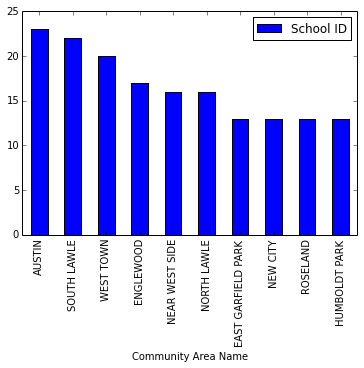

In [21]:
df[['School ID', 'Community Area Name']].groupby('Community Area Name').count().sort('School ID', ascending=False)[:10].plot(kind='bar')

### Question 7 (7 points):
    Show a plot of the number of community areas under each collaborative.

#### Description

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


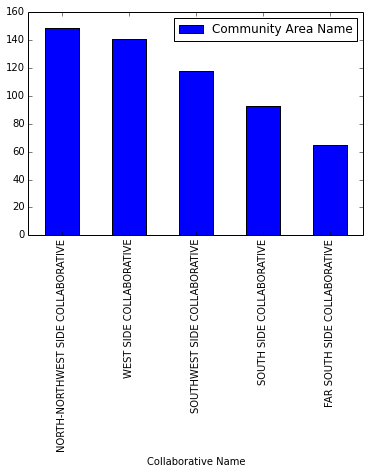

In [29]:
df[['Collaborative Name', 'Community Area Name']].groupby('Collaborative Name').count().sort('Community Area Name', ascending=False).plot(kind='bar')

### Question 8 (7 points)
    Find the Community Area Names for the top-10 schools with highest rates of misconduct.

#### Description

In [34]:
list(df.sort('Rate of Misconducts (per 100 students)')[:10]['Community Area Name'].unique())

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


['NORTH LAWLE',
 'NORTH CENTER',
 'NEAR WEST SIDE',
 'MORGAN PARK',
 'IRVING PARK',
 'EDISON PARK',
 'CHATHAM',
 'BELMONT CRAGIN',
 'NEAR NORTH SIDE',
 'PULLMAN']

### Question 9 (7 points)
    For each Collaborative, find the school with the highest rate of misconduct.

#### Description

In [49]:
df[['Name of School', 'Rate of Misconducts (per 100 students)', 'Collaborative Name']].groupby(['Collaborative Name']).max()

,Name of School,Rate of Misconducts (per 100 students)
Collaborative Name,,
FAR SOUTH SIDE COLLABORATIVE,William E B Dubois Elementary School,90.0
NORTH-NORTHWEST SIDE COLLABORATIVE,Wolfgang A Mozart Elementary School,77.0
SOUTH SIDE COLLABORATIVE,Woodlawn Community Elementary School,156.6
SOUTHWEST SIDE COLLABORATIVE,William T Sherman Elementary School,230.6
WEST SIDE COLLABORATIVE,World Language Academy High School,251.6


---

## Questions 10-12 use the Investor_Sentiment_Data.csv dataset.

Setup for the next few questions: Read in investor sentiment data, and set _Date_ as the index. Use the following code.

In [50]:
sentimentData = pd.read_csv("Investor_Sentiment_Data.csv", parse_dates=['Date']).set_index('Date')
sentimentData[-5:]

,Bullish,Neutral,Bearish,Total,S&P 500 Weekly High,S&P 500 Weekly Low,S&P 500 Weekly Close
Date,,,,,,,
1987-08-07,0.56,0.15,0.29,1.0,323.00,316.23,323.00
1987-07-31,0.26,0.48,0.26,1.0,318.66,310.65,318.66
1987-07-24,0.36,0.50,0.14,1.0,311.39,307.81,309.27
1987-07-17,NaN,NaN,NaN,NaN,314.59,307.63,314.59
1987-06-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Question 10 (7 points)
    Find the average S&P Weekly Close every month and print the first 5 records.

#### Description


In [57]:
sentimentData['S&P 500 Weekly Close'].resample('M', kind='period').mean()[:5]

Date
1987-06           NaN
1987-07    314.173333
1987-08    328.982500
1987-09    318.425000
1987-10    284.370000
Freq: M, Name: S&P 500 Weekly Close, dtype: float64

### Question 11 (7 points)
    For each week, compute the return over the next week, and plot it against the bullish sentiment for that week.
    
$\mbox{weekly return for week}\; i = \dfrac{\mbox{(S&P weekly close for week}\; i+1\mbox{) - (S&P weekly close for week}\; i)}{\mbox{(S&P weekly close for week}\; i)}$

#### Description

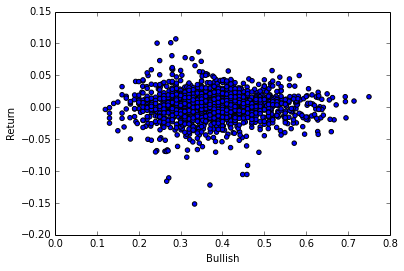

In [96]:
sentimentData['Return'] = (sentimentData['S&P 500 Weekly Close'].shift(1) - sentimentData['S&P 500 Weekly Close']) / sentimentData['S&P 500 Weekly Close']
sentimentData[['Bullish', 'Return']].dropna().plot(x='Bullish', y='Return', kind='scatter')

### Question 12 (8 points)
    Define "Gap Up" and "Gap Down" weeks as follows.
    
$\mbox{Week i is Gap Up if}\quad \mbox{Weekly low for week}\; i+1 > 1.005 * \mbox{Weekly high for week}\; i$
$\mbox{Week i is Gap Down if}\quad \mbox{Weekly high for week}\; i+1 < 0.995 * \mbox{Weekly low for week}\; i$
    
    Draw a figure with two subplots, showing the histograms of Bullish sentiment during Gap Up weeks and Gap Down Weeks. How would you interpret the results?
    
_Hint_: Use parentheses in constructing masks.

_Warning_: This question might take a little more time than the others...

#### Description

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


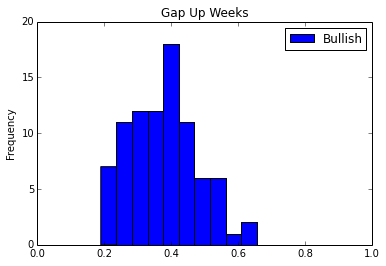

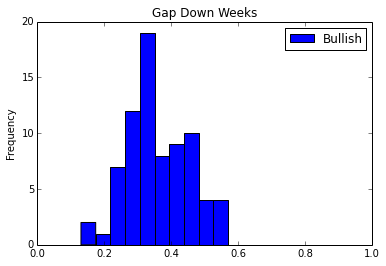

In [109]:
gapUp = sentimentData.shift(1)['S&P 500 Weekly Low'] > (1.005 * sentimentData['S&P 500 Weekly High'])
gapDown = sentimentData.shift(1)['S&P 500 Weekly High'] < (0.995 * sentimentData['S&P 500 Weekly Low'])
sentimentData['Gap'][gapUp] = "Gap Up"
sentimentData['Gap'][gapDown] = "Gap Down"

sentimentData[['Bullish', 'Gap']][gapUp].plot(kind='hist', xlim=(0,1), ylim=(0,20), title="Gap Up Weeks")
sentimentData[['Bullish', 'Gap']][gapDown].plot(kind='hist',  xlim=(0,1), ylim=(0,20), title="Gap Down Weeks")

#### Interpretation

In Gap Up weeks, bullish sentiment appears to be generally higher than in Gap Down weeks. In Gap Up weeks, the bin of Bullish sentiment with the highest frequency os around 0.4, while in Gap Down weeks it's about 0.3. This indicates that Bullish sentiment somewhat accurately reflects whether a week is Gap Up or Gap Down.

### Question 13 (7 points)
    Regress bullish sentiment against bearish and neutral sentiments. Interpret the results.

#### Description

In [116]:
import statsmodels.api as sm
from patsy import dmatrices

y, X = dmatrices("Bullish ~ Bearish + Neutral", data=sentimentData, return_type='dataframe')
result = sm.OLS(y, X).fit()
print result.summary()

                            OLS Regression Results                            
Dep. Variable:                Bullish   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.937e+09
Date:                Mon, 15 May 2017   Prob (F-statistic):               0.00
Time:                        10:51:29   Log-Likelihood:                 12355.
No. Observations:                1500   AIC:                        -2.470e+04
Df Residuals:                    1497   BIC:                        -2.469e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0000   1.01e-05    9.9e+04      0.0

#### Interpretation

Regressing Bullish on Bearish and Neutral is pretty dumb considering the three up them add up to 1 since it's a ratio.

---

## Questions 14-15 do classification on the same Investor Sentiment dataset.

Instructions for loading the dataset were presented earlier. You don't need to load it in again.

### Question 14 (4 points)
    Add a column to the dataframe called target, that is 1 if the weekly return (defined in Q11) is greater than 0.02, and 0 otherwise. How often is the target 1, and how often is it 0?

#### Description

In [140]:
sentimentData.loc[sentimentData['Return'] > 0.02, 'Target'] = 1
sentimentData.loc[sentimentData['Return'] <= 0.02, 'Target'] = 0

sentimentData['Target'].value_counts()

0.0    1271
1.0     230
Name: Target, dtype: int64

### Question 15 (10 points)
    Use a k-Nearest-Neighbors with 15 neighbors to predict the target based on the degree of bullish and bearish sentiments. Split the data into 70% train and 30% test, and print the training and testing accuracy of this classifier.

#### Description


In [145]:
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn import metrics

formula = "Target ~ Bullish + Bearish"
y, X = dmatrices(formula, data=sentimentData, return_type="dataframe")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
model = neighbors.KNeighborsClassifier(n_neighbors=15, weights='uniform', p=2)
model.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=15, p=2,
           weights='uniform')

In [146]:
training = model.predict(X_train)
print "Training accuracy:", metrics.accuracy_score(y_train, training)

testing = model.predict(X_test)
print "Testing accuracy:", metrics.accuracy_score(y_test, testing)

Training accuracy: 0.848427073403
Testing accuracy: 0.84
